In [1]:
#import relevant libraries
import wordcloud
import matplotlib
import bs4
import csv
import pandas
import numpy as np
from collections import Counter
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [8]:
#open connection, grab page
my_url = 'https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2380057.m570.l1313.TR1.TRC0.A0.H0.Xsport+items.TRS0&_nkw=sport+items&_sacat=0'
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

In [9]:
page_soup = soup(page_html,"html.parser")

In [12]:
page_soup.body.span

<span class="relSrc">Related</span>

In [17]:
containers = page_soup.findAll("li", {"class":"sresult lvresult clearfix li shic"})

In [18]:
len(containers)

23

In [19]:
containers[1]

<li _sp="p2045573.m1686.l2217" class="sresult lvresult clearfix li shic" id="item2aa402b9b5" listingid="183140268469" r="7">
<div class="lvpic pic img left" iid="183140268469">
<div class="lvpicinner full-width picW">
<a class="img imgWr2" href="https://www.ebay.com/itm/Scorpion-Belt-Buckle-with-Slide-Out-Knife-This-is-a-Very-Unique-item/183140268469?hash=item2aa402b9b5:g:OGYAAOSwjSJae3JI">
<img alt="Scorpion Belt Buckle with Slide Out Knife, This is a Very Unique item" class="img" src="https://i.ebayimg.com/thumbs/images/g/OGYAAOSwjSJae3JI/s-l225.jpg"/>
</a>
</div></div>
<h3 class="lvtitle"><a class="vip" href="https://www.ebay.com/itm/Scorpion-Belt-Buckle-with-Slide-Out-Knife-This-is-a-Very-Unique-item/183140268469?hash=item2aa402b9b5:g:OGYAAOSwjSJae3JI" title="Click this link to access Scorpion Belt Buckle with Slide Out Knife, This is a Very Unique item">Scorpion Belt Buckle with Slide Out Knife, This is a Very Unique item</a>
</h3>
<div class="lvsubtitle">
		New (Other)</div>
<ul 

In [35]:
container = containers[0]
container.h3.a.string

'PSE King Sport Line Grip Convector Neoprene CLEARANCE $ 9.17 item# 24681'

In [59]:
productStateContainer = container.findAll("div", {"class":"lvsubtitle"})
productStateContainer[0].text.strip()

'Brand New'

In [60]:
productPrice = container.span.text
productPrice.strip()

'$109.00'

In [66]:
#open csv file for writing
file_name = "eBayProducts.csv"
f = open(file_name,"w")
#write headers to csv
headers = "ProductName, ProductState, ProducrPrice\n"
f.write(headers)

40

In [67]:
for container in containers:
    productName = container.h3.a.string
    productStateContainer = container.findAll("div", {"class":"lvsubtitle"})
    productState = productStateContainer[0].text.strip()
    productPrice = container.span.text.strip()
    f.write(productName.replace(",", "|").replace("\n","") + "," + productState.replace(",", "|") + "," + productPrice.replace(",", "|") + "\n")
    
f.close() 

In [71]:
#create arrays to hold data from csv columns
price = []
productName = []

#read data from csv columns to arrays
with open('eBayProducts.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ',')
    for row in readCSV:
        productName.append(row[0])
        price.append(row[2])

In [72]:
#seperate entries with multip authors
new_product = []
for product in productName:
	new_product.extend(product.split(' '))
#clean white space
#new_authors = [x.strip() for x in new_authors[2:]]

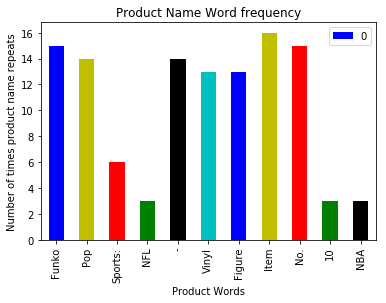

In [82]:
#create dictionary 
productCount = Counter(new_product)

#remove objects from dictionary count less than 2
for k in list(productCount):
	if productCount[k] < 3:
		del productCount[k]
		
#use pandas library to create bar graph
df = pandas.DataFrame.from_dict(productCount, orient='index')
df.plot(kind = 'bar', color = 'byrgkc')
plt.title("Product Name Word frequency")
plt.xlabel("Product Words")
plt.ylabel("Number of times product name repeats")
plt.show()

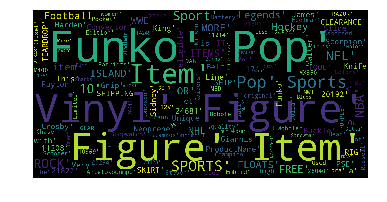

In [83]:
#Create Word cloud
wc = WordCloud(scale = 4)
wc.generate(str(new_product))
plt.imshow(wc)
plt.axis('off')
plt.show()